### Quality-Assurance-Microchip_Implementation of Regularized Logistic Rgression
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected.

<img src="./images/Quality_Assurance_microchips.jpeg" alt="Image for illustration purpose only" width="300" />

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from scipy.optimize import minimize

#### Data visualization

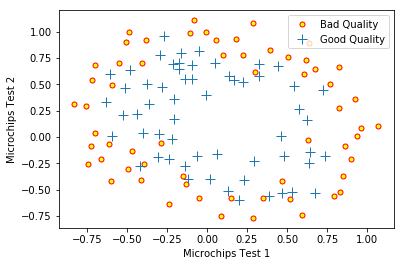

In [61]:
with open('data/Quality_Assurance_microchips.txt', 'r') as f:
    data = f.readlines()
data = [list(map(float, i.split(','))) for i in data]
data = np.array(data)
X = data[:,:-1]; y = data[:,-1]
m,n = X.shape[0], X.shape[1]     # number of training examples
fig, ax = plt.subplots()
#np.argwhere(y=0)
s0 =[i for i in range(m) if y[i] ==0]
s1 =[i for i in range(m) if y[i] ==1]
ax.plot(X[:,0][s0],X[:,1][s0], 'ro', markersize=5, markerfacecolor='Yellow', label='Bad Quality')
ax.plot(X[:,0][s1],X[:,1][s1], '+', markersize=10, markerfacecolor='blue', label='Good Quality')
y = y.reshape(m,1)
plt.ylabel('Microchips Test 2')
plt.xlabel('Microchips Test 1')
legend = ax.legend(loc='upper right', shadow=False, fontsize='medium')
tmp = X

#### Feature Mapping

In [62]:
# Get more polynomial features like x1**i * x2**j where i+j<=degree
def mapFeature(X):
    degree = 6
    m = X.shape[0]
    newX = [np.multiply(X[:,0]**i, X[:,1]**j) for i in range(0,degree+1) for j in range(0,degree+1-i)]
    newX = np.array(newX).T
    return newX
X = mapFeature(tmp)

In [63]:
initial_theta = np.zeros((X.shape[1],1))
lamda = 1

def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1.0/(1+np.exp(-z))
    return g

def costFunctionReg(theta, X, y, lamda):
    m,n = X.shape[0], X.shape[1]
    J = 0.0
    grad= np.zeros(theta.shape)
    h =  sigmoid(X.dot(theta))
    J = 1./m*( -(np.log(h)).T.dot(y)  -  (np.log(1-h)).T.dot(1-y) ) \
        + lamda/(2*m)*(theta[1:].T.dot(theta[1:]))
    return J

def gradient(theta, X, y, lamda):
    m,n = X.shape[0], X.shape[1]
    grad= np.zeros(theta.shape)
    h =  sigmoid(X.dot(theta))
    grad = 1.0/m*(X.T).dot(h-np.squeeze(y)) + lamda/m*theta
    grad[0] = grad[0] - lamda/m*theta[0]
    return grad

In [64]:
initial_theta = np.ones((X.shape[1],1))
lamda = 1
xopt = minimize(costFunctionReg, x0=initial_theta, args = (X,y,lamda), jac = gradient, method='TNC', options={'disp': True})


#### Plot Decision Boundary

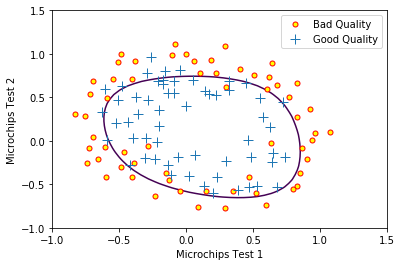

In [65]:
def plotDecisionBoundary(theta, X,y):
        # Grid range
    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    z = np.zeros((u.shape[0],v.shape[0])) 
    degree = 6

    for i in range(u.shape[0]):
        for j in range(v.shape[0]):
            mapFeature = [u[i]**a*v[j]**b for a in range(0,degree+1) for b in range(0,degree+1-a)]
            mapFeature = np.array(mapFeature)
            z[i,j] = mapFeature.dot(theta)
    ax.contour(u,v,z,0) 
plotDecisionBoundary(xopt.x, X,y)
fig

#### Prediction & Accuracies

In [66]:
prob = sigmoid(np.array([0.5**a*1.2**b for a in range(0,6+1) for b in range(0,6+1-a)]).T.dot(xopt.x))
print('For a student with Test1= 0.5 and Test2 =1.2, we predict an admission probability of:\n %f' % prob)

For a student with Test1= 0.5 and Test2 =1.2, we predict an admission probability of:
 0.000195


In [67]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((X.shape[0],1))
    h = sigmoid(X.dot(theta))
    p = [0 if i<0.5 else 1 for i in h ]
    return p
p = predict(xopt.x, X)
accu = sum([1 for i in range(m) if abs(p[i]-y[i]) < 0.001 ])/m * 100
print('Train Accuracy: %.1f\n'% accu);

Train Accuracy: 83.1



### Appendix
#### Plot Decision Boundary for different regularization parameter lambda

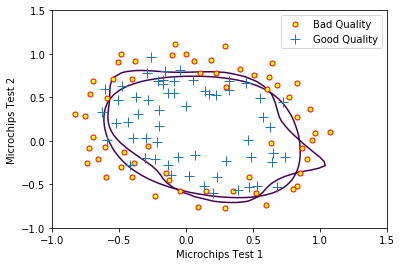

In [68]:
lamda = 0
xopt = minimize(costFunctionReg, x0=initial_theta, args = (X,y,lamda), jac = gradient, method='TNC', options={'disp': True})
plotDecisionBoundary(xopt.x, X,y)
fig



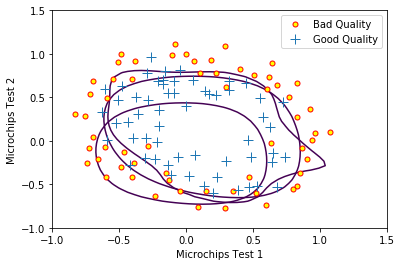

In [69]:
lamda = 100
xopt = minimize(costFunctionReg, x0=initial_theta, args = (X,y,lamda), jac = gradient, method='TNC', options={'disp': True})
plotDecisionBoundary(xopt.x, X,y)
fig